In [187]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
%matplotlib inline
np.random.seed(0)
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sns.set_theme(context="notebook")

In [188]:
s5 = pd.read_csv('selection_5_df.csv')
s10 = pd.read_csv('selection_10_df.csv')
s15 = pd.read_csv('selection_10_df.csv')
s20 = pd.read_csv('selection_10_df.csv')
s30 = pd.read_csv('selection_10_df.csv')
s40 = pd.read_csv('selection_10_df.csv')
s42 = pd.read_csv('selection_10_df.csv')
s50 = pd.read_csv('selection_10_df.csv')
s60 = pd.read_csv('selection_10_df.csv')
s70 = pd.read_csv('selection_10_df.csv')
s80 = pd.read_csv('selection_10_df.csv')
test = pd.read_csv('./test.csv')
dT = pd.read_csv('./train.csv')
dT.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,...,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,...,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1
3,3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,...,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486,1
4,4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,...,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,1


In [189]:
train = dT.dropna().copy()
y = train['claim'].copy()
print(train.isnull().sum())
# train = train[list(s42.loc[0:42,'Feature'])]
X = train.copy()
train.head()

id       0
f1       0
f2       0
f3       0
f4       0
        ..
f115     0
f116     0
f117     0
f118     0
claim    0
Length: 120, dtype: int64


,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
1,1,0.100900,0.29961,11822.000,0.276500,0.459700,-0.837330,1721.900,119810.0,3.874100e+15,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.00,0.28359,0
8,8,-0.008948,0.33802,503.810,0.601520,0.261760,0.735380,1614.000,408030.0,7.684400e+14,...,-9.5142,2.2176,-1.23750,7.07130,1030.80,1.2040,5.290300e+15,1968.10,0.14593,0
9,9,0.126230,0.17396,1662.000,0.038081,0.000485,0.059909,296.070,-8035.3,4.526300e+15,...,-1.9684,3.9595,19.16900,-0.24498,838.39,1.1968,2.567000e+17,4914.90,0.51976,0
11,11,0.078650,0.38745,1025.900,0.082626,0.267070,-1.476200,2170.100,513560.0,9.716600e+12,...,-17.1010,1.5954,121.02000,-9.33300,45667.00,1.2490,5.059300e+15,5422.30,0.57097,0
14,14,0.072488,0.47341,-22.274,0.002846,0.384460,3.548400,-40.267,739910.0,4.615400e+15,...,-10.3290,1.6152,195.36000,1.05310,1806.40,1.2229,6.537300e+15,591.48,0.30038,1


C:\Users\alexa\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


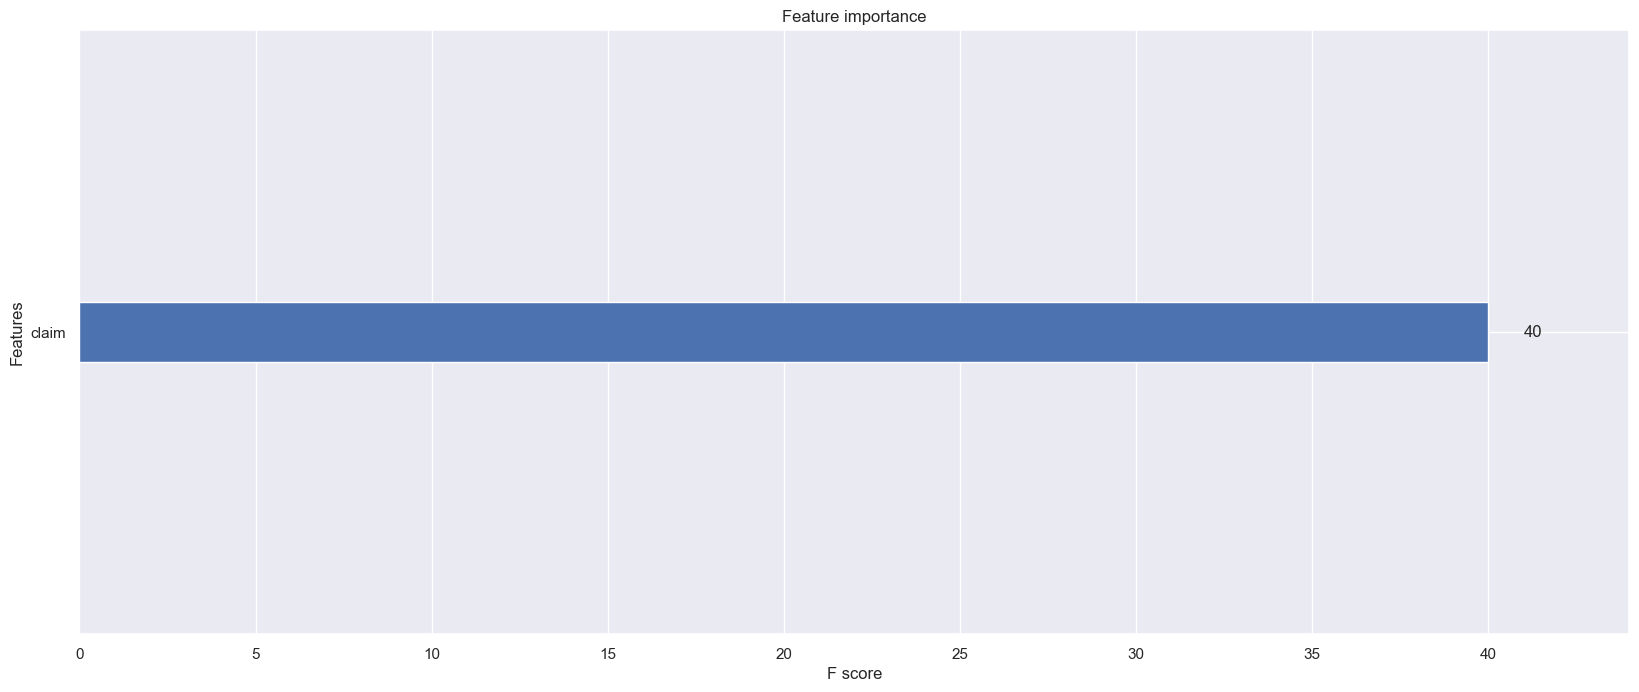

In [190]:
from xgboost import XGBClassifier
from xgboost import plot_importance
model = XGBClassifier()
model.fit(X, y)
plot_importance(model)
plt.show()

In [197]:
from sklearn.model_selection import train_test_split
# X = X[feats[0:int(len(feats)/2)]]
X_go = X.drop(['id','claim'],axis=1).copy()
scaler = MinMaxScaler()
scaler.fit(X_go)
X_go = scaler.transform(X_go)
y_go = y
X_train, X_valid, y_train, y_valid = train_test_split(X_go, y_go, test_size=0.33, random_state=42)
print(X_train)

[[0.44048576 0.75762842 0.19410411 ... 0.15843914 0.02587666 0.08962664]
 [0.41499817 0.90247452 0.1898791  ... 0.02480573 0.28401761 0.08689077]
 [0.50224617 0.75145051 0.19960517 ... 0.03486469 0.22834452 0.6490301 ]
 ...
 [0.36859934 0.49653702 0.18881886 ... 0.02489169 0.24532603 0.4751095 ]
 [0.24203251 0.61942545 0.66132869 ... 0.08221225 0.44748125 0.35648335]
 [0.33597151 0.96023431 0.19926102 ... 0.60701768 0.50625262 0.59326983]]


In [198]:
print(y_train.shape)
print(X_train.shape)
print(y_valid.shape)
print(X_valid.shape)
print([y_train.shape[0]])
print(y_valid)

(240840,)
(240840, 118)
(118624,)
(118624, 118)
[240840]
735464    0
789188    0
905701    0
364966    0
802402    0
         ..
46658     1
236434    0
223597    0
477107    1
819708    0
Name: claim, Length: 118624, dtype: int64


In [193]:
# X_train.head()

In [199]:
from tensorflow import keras
from tensorflow.keras import layers

input_shape= [X_train.shape[1]]

model = keras.Sequential([
    layers.Dense(42,input_shape=input_shape, activation='sigmoid', kernel_initializer=keras.initializers.GlorotNormal()),
    layers.BatchNormalization(),
    layers.Dropout(rate = 0.3),
    layers.Dense(42*5, activation='sigmoid', kernel_initializer=keras.initializers.GlorotNormal()),
    layers.BatchNormalization(),
    layers.Dropout(rate = 0.3),
    layers.Dense(42*5, activation='sigmoid', kernel_initializer=keras.initializers.GlorotNormal()),
    layers.BatchNormalization(),
    layers.Dropout(rate = 0.3),
    layers.Dense(42*5, activation='sigmoid', kernel_initializer=keras.initializers.GlorotNormal()),
    layers.BatchNormalization(),
    layers.Dropout(rate = 0.3),
    layers.Dense(42, activation='sigmoid', kernel_initializer=keras.initializers.GlorotNormal()),
    layers.BatchNormalization(),
    layers.Dropout(rate = 0.3),
    layers.Dense(1, activation='sigmoid')
])

# model = keras.Sequential([
#     layers.Dense(42,input_shape=input_shape, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dropout(rate = 0.3),
#     layers.Dense(42*5, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dropout(rate = 0.3),
#     layers.Dense(42*5**2, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dropout(rate = 0.3),
#     layers.Dense(42*5**3, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dropout(rate = 0.3),
#     layers.Dense(42*5**2, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dropout(rate = 0.3),
#     layers.Dense(42*5, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dropout(rate = 0.3),
#     layers.Dense(42, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dropout(rate = 0.3),
#     layers.Dense(1, activation='softmax')
# ])

rmsprop = keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
)

metrica = keras.metrics.AUC(
    num_thresholds=200, curve='ROC',
    summation_method='interpolation', name='auc', dtype=None,
    thresholds=None, multi_label=False, num_labels=None, label_weights=None,
    from_logits=False
)
# keras.optimizers.Adam()
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    loss = 'binary_crossentropy',
    metrics = [metrica]
)

model.summary()
from tensorflow.keras import callbacks

guardaDeTransito = callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights = True
)

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_122 (Dense)            (None, 42)                4998      
_________________________________________________________________
batch_normalization_97 (Batc (None, 42)                168       
_________________________________________________________________
dropout_97 (Dropout)         (None, 42)                0         
_________________________________________________________________
dense_123 (Dense)            (None, 210)               9030      
_________________________________________________________________
batch_normalization_98 (Batc (None, 210)               840       
_________________________________________________________________
dropout_98 (Dropout)         (None, 210)               0         
_________________________________________________________________
dense_124 (Dense)            (None, 210)             

In [195]:
# X_train.columns

In [200]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=300,
    epochs=50,
    verbose=1,
    callbacks=[guardaDeTransito]
)

Epoch 1/50
803/803 [==============================] - 57s 14ms/step - loss: 0.4670 - auc: 0.5023 - val_loss: 0.3961 - val_auc: 0.5028
Epoch 2/50
803/803 [==============================] - 12s 15ms/step - loss: 0.4059 - auc: 0.5018 - val_loss: 0.3941 - val_auc: 0.5158
Epoch 3/50
803/803 [==============================] - 13s 16ms/step - loss: 0.4015 - auc: 0.5056 - val_loss: 0.3942 - val_auc: 0.5195
Epoch 4/50
803/803 [==============================] - 11s 14ms/step - loss: 0.3999 - auc: 0.5082 - val_loss: 0.3938 - val_auc: 0.5282
Epoch 5/50
803/803 [==============================] - 13s 16ms/step - loss: 0.3985 - auc: 0.5180 - val_loss: 0.3936 - val_auc: 0.5314
Epoch 6/50
803/803 [==============================] - 12s 15ms/step - loss: 0.3976 - auc: 0.5232 - val_loss: 0.3935 - val_auc: 0.5345
Epoch 7/50
803/803 [==============================] - 11s 14ms/step - loss: 0.3974 - auc: 0.5234 - val_loss: 0.3934 - val_auc: 0.5339
Epoch 8/50
803/803 [==============================] - 10s 13ms

<AxesSubplot:title={'center':'Accuracy'}>

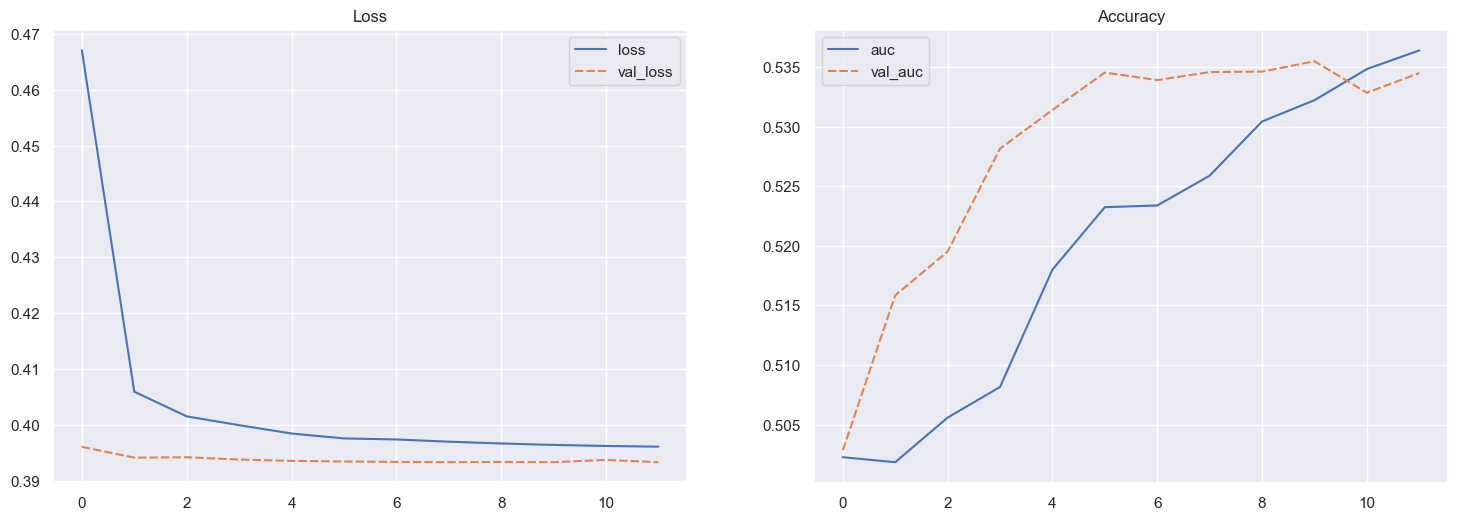

In [204]:
historyd = pd.DataFrame(history.history)
fig, axs = plt.subplots(1,2, figsize = (18,6))

axs[0].set_title('Loss')
sns.lineplot(data = historyd.loc[:,['loss', 'val_loss']], ax = axs[0])

axs[1].set_title('Accuracy')
sns.lineplot(data = historyd.loc[:,['auc', 'val_auc']], ax = axs[1])

In [205]:
feats = X.drop(['claim','id'],axis=1).columns
print(feats)
test[feats].head()

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       ...
       'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117',
       'f118'],
      dtype='object', length=118)


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
0,0.165850,0.487050,1295.00,0.02310,0.31900,0.90188,573.29,3743.7,2.705700e+12,6221.000,...,0.16253,-22.1890,2.0655,0.430880,-10.7410,81606.0,1.1940,1.980400e+14,2017.1,0.46357
1,0.129650,0.373480,1763.00,0.72884,0.33247,-1.26310,875.55,554370.0,5.955700e+14,934.430,...,0.81528,-1.6342,1.5736,-1.071200,11.8320,90114.0,1.1507,4.388000e+16,6638.9,0.28125
2,0.120190,0.445210,736.26,0.04615,0.29605,0.31665,2659.50,317140.0,3.977800e+14,131.810,...,0.81831,-32.7800,2.1364,-1.931200,-3.2804,37739.0,1.1548,1.718100e+14,5844.0,0.13797
3,0.054008,0.395960,996.14,0.85934,0.36678,-0.17060,386.56,325680.0,-3.432200e+13,-26.473,...,0.86559,-2.4162,1.5199,-0.011633,1.3840,26849.0,1.1490,2.138800e+17,6173.3,0.32910
4,0.079947,-0.006919,10574.00,0.34845,0.45008,-1.84200,3027.00,428150.0,9.291500e+11,5999.400,...,0.25190,-18.6300,3.7387,0.757080,-4.9405,50336.0,1.2488,2.151300e+17,2250.1,0.33796


In [206]:
sub = model.predict(test[feats])
mysub = pd.DataFrame(test['id'])
mysub['claim'] = sub
mysub['claim'] = mysub['claim'].fillna(0)
mysub.head(10)

,id,claim
0,957919,0.000000
1,957920,0.127257
2,957921,0.000000
3,957922,0.127257
4,957923,0.135452
5,957924,0.153343
6,957925,0.000000
7,957926,0.150507
8,957927,0.000000
9,957928,0.000000


In [207]:
print(test.shape)
print(mysub.shape)
print(mysub.isnull().sum())
# sub = sub.drop(0,axis=1)
# print(sub.isnull().sum())
mysub.head()

(493474, 119)
(493474, 2)
id       0
claim    0
dtype: int64


,id,claim
0,957919,0.000000
1,957920,0.127257
2,957921,0.000000
3,957922,0.127257
4,957923,0.135452


id       1.204656e+08
claim    5.378841e+00
dtype: float64


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'claim'}>]], dtype=object)

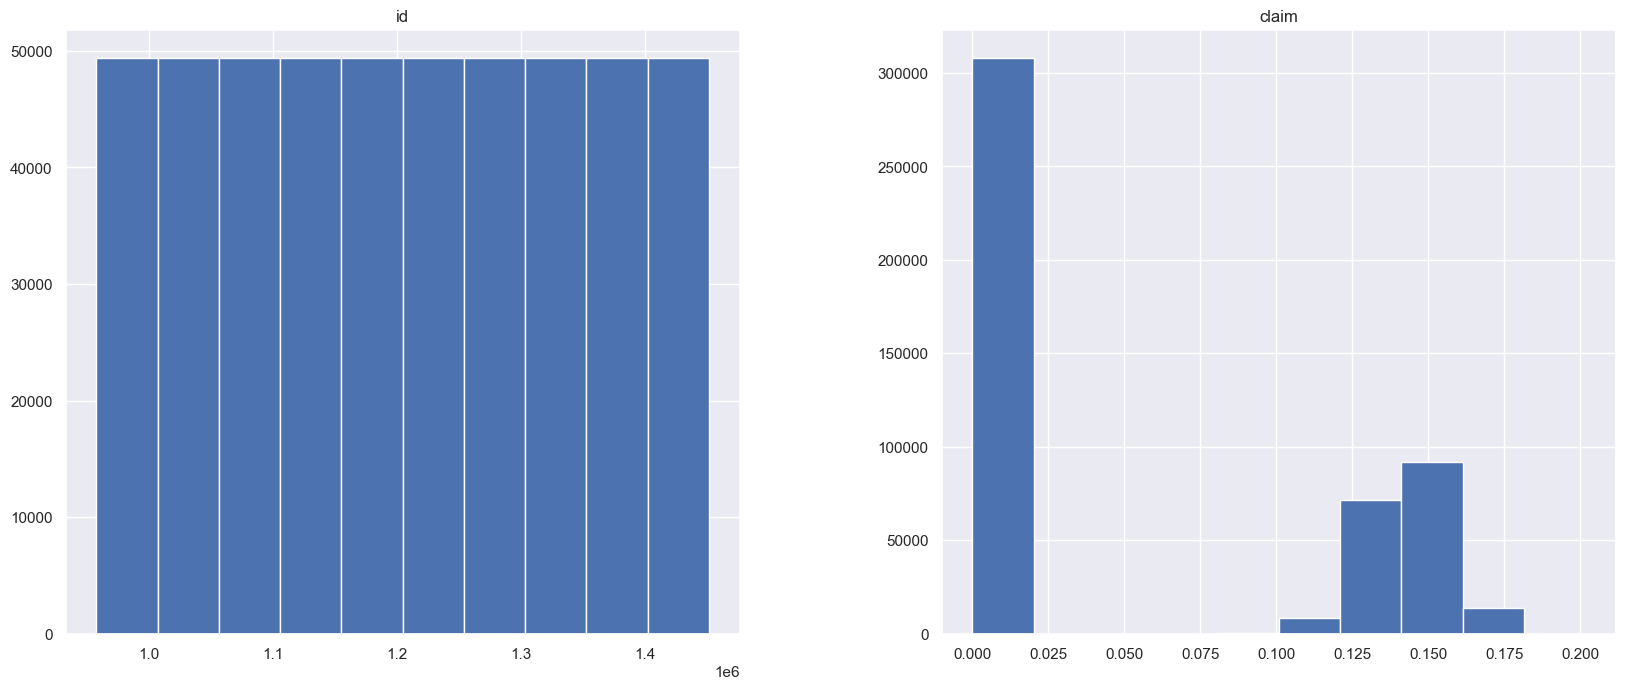

In [209]:
print(mysub.mean()*100)
mysub.hist()


In [ ]:
var = 'second'
mysub.to_csv(var+'_submisssion.csv',index=False)

In [230]:
from sklearn.model_selection import cross_validate
import warnings 
warnings.filterwarnings('ignore')
seed = 42
fold = 10
model_xgb = XGBClassifier(
    max_depth=12,
    subsample=.85,
    colsample_bytree=.3,
    reg_lambda=12,
    # gamma=5,
    tree_method='gpu_hist',
    sampling_method='gradient_based', 
    random_state= seed,
)
def score(X, y, model_xgb, cv):
    scoring = ["roc_auc"]
    scores = cross_validate(
        model_xgb, X, y, scoring=scoring, cv=cv, return_train_score=True
    )
    scores = pd.DataFrame(scores).T
    return scores.assign(
        mean = lambda x: x.mean(axis=1),
        std = lambda x: x.std(axis=1),
    )

model_xgb.fit(X_train,y_train)
scores = score(X_valid, y_valid, model_xgb, cv=fold)
display(scores)

XGBoostError: [16:50:32] C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_gpu_hist.cu:793: Exception in gpu_hist: [16:50:32] c:\users\administrator\workspace\xgboost-win64_release_1.4.0\src\data\../common/device_helpers.cuh:414: Memory allocation error on worker 0: [16:50:32] c:\users\administrator\workspace\xgboost-win64_release_1.4.0\src\common\common.h:45: c:\users\administrator\workspace\xgboost-win64_release_1.4.0\src\common\device_helpers.cuh: 433: cudaErrorMemoryAllocation: out of memory
- Free memory: 0
- Requested memory: 109886016



In [228]:
sub = model_xgb.predict(test.drop('id',axis=1))
mysub = pd.DataFrame(test['id'])
mysub['claim'] = sub
mysub['claim'] = mysub['claim'].fillna(0)
mysub.head(10)
mysub['claim'].hist()

NotFittedError: need to call fit or load_model beforehand